### Setup

# todo:
- spacings for green line for 5 discs from equidistant
- find best config from fixed set of available rings/distances
- check initial conditions
- move to 6-7 discs afterwards
- export plot, distances, reflectivity, boost: 50 of each

In [1]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`


In [2]:
using Dragoon
using Plots
# using Dates

In [3]:
d0 = [
    0.008378903804735749,
    0.012253233150736646,
    0.012524097205944074,
    0.013025845048859902,
    0.009806586762534202,
]

p0 = dist2pos(d0)

freqs = genFreqs(18.65e9,10e6; n=100) # optimize on these frequencies
freqsplot = genFreqs(18.65e9,500e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(p0; ϵ=9.35,tand=3e-5,R=0.1)  # physical properties of the booster

hist = initHist(booster,10000,freqs,ObjAnalytical); # stores measurements

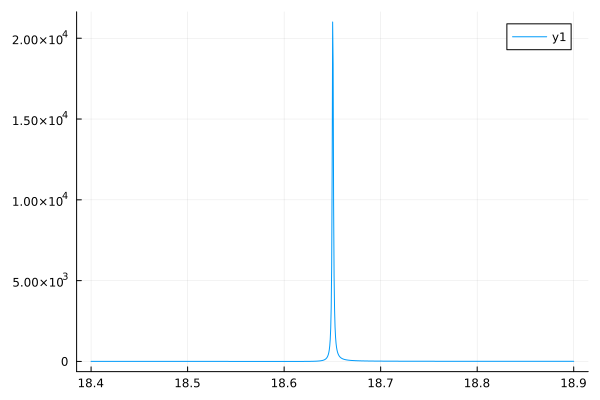

In [4]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

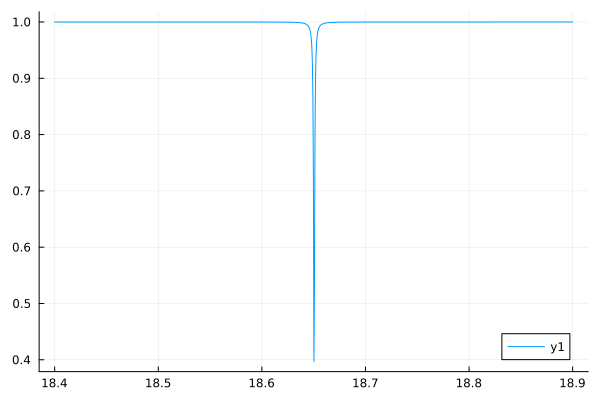

In [5]:
ref = getRef1d(booster,freqsplot)
plot(freqsplot/1e9,abs.(ref))

### Optimizer

In [6]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/booster.ndisk,0.75-1/2booster.ndisk,1-1/booster.ndisk,1e-9,
                    ObjAnalytical,
                    InitSimplexCoord(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e3),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true);

Iter: 100, timestamp: 2 minutes, 14 seconds
Iter finished. Objective value: -2366.573

Iter: 200, timestamp: 2 minutes, 45 seconds
Iter finished. Objective value: -2386.251

Iter: 300, timestamp: 3 minutes, 11 seconds
Iter finished. Objective value: -2401.018

Iter: 400, timestamp: 3 minutes, 13 seconds
Iter finished. Objective value: -2401.806

Iter: 500, timestamp: 3 minutes, 38 seconds
Iter finished. Objective value: -2415.469

Iter: 600, timestamp: 3 minutes, 47 seconds
Iter finished. Objective value: -2419.031

Iter: 700, timestamp: 4 minutes, 3 seconds
Iter finished. Objective value: -2434.587

Iter: 800, timestamp: 4 minutes, 4 seconds
Iter finished. Objective value: -2435.278

Iter: 900, timestamp: 4 minutes, 26 seconds
Iter finished. Objective value: -2448.773

Iter: 1000, timestamp: 4 minutes, 27 seconds
Iter finished. Objective value: -2448.78

Terminated. Max iterations reached.
Final objective value: -2448.78
Elapsed movement time:  4 minutes, 27 seconds
Summed distance:  

In [7]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

5-element Vector{Float64}:
 0.008388760593186651
 0.02161708555457157
 0.03475555461818803
 0.049511499702259994
 0.059308032697711885

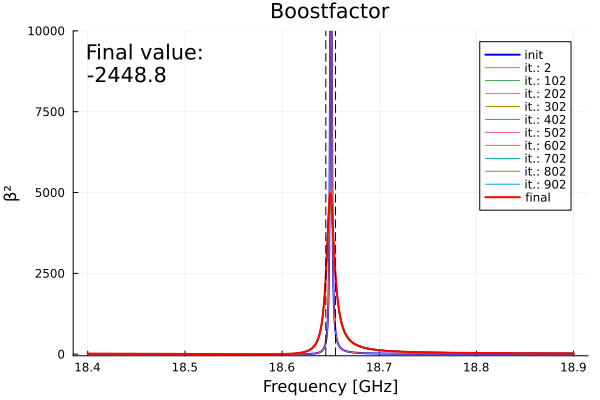

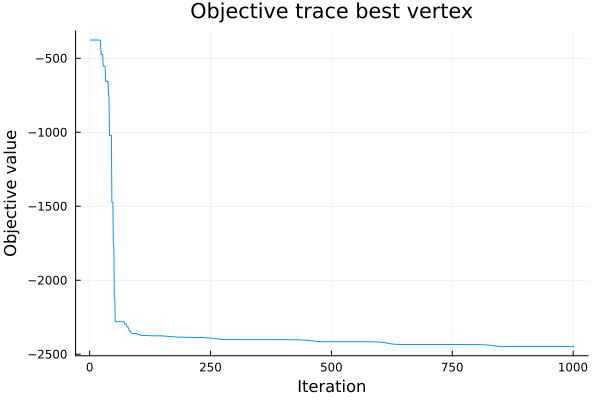

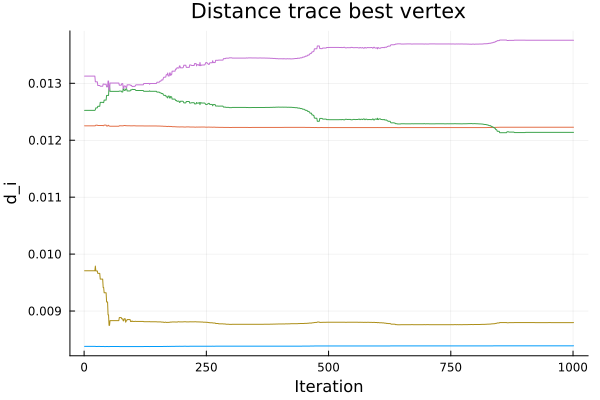

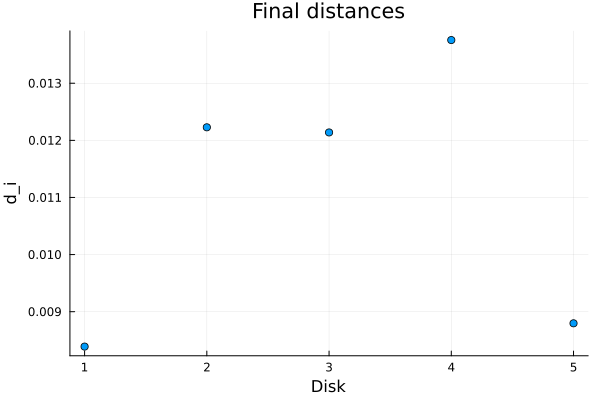

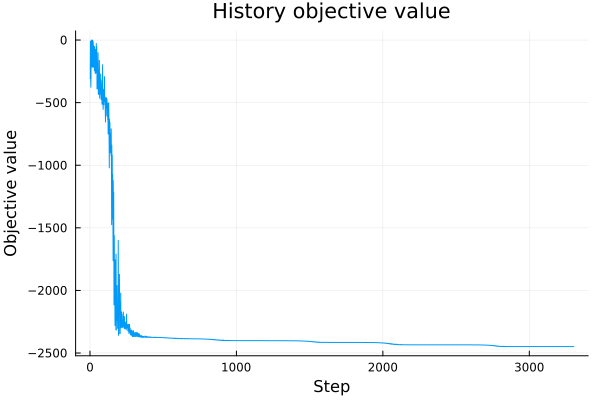

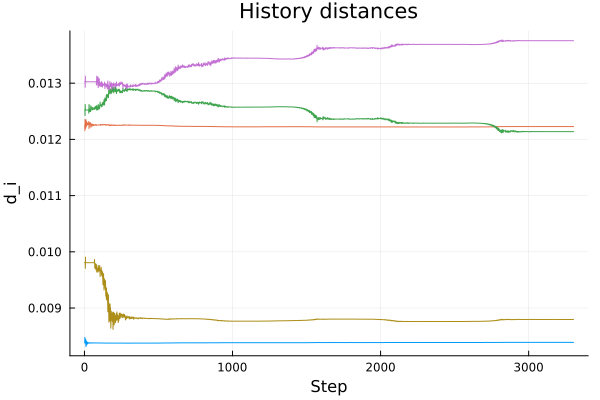

(Plot{Plots.GRBackend() n=13}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=5}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=5})

In [11]:
#get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[-50,10000])

#savefig(plt[i],"cool_epic_result_wow.svg")

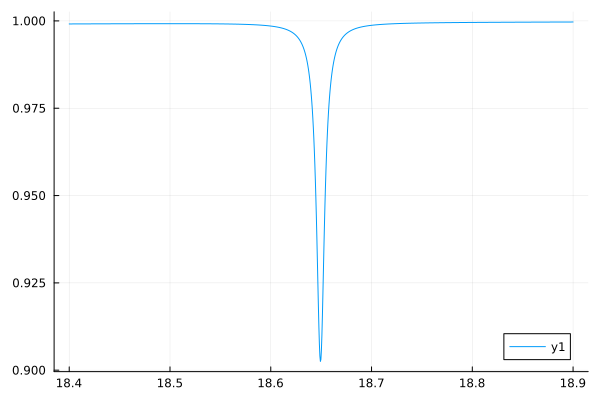

In [9]:
ref = getRef1d(booster,freqsplot)
plot(freqsplot/1e9,abs.(ref))

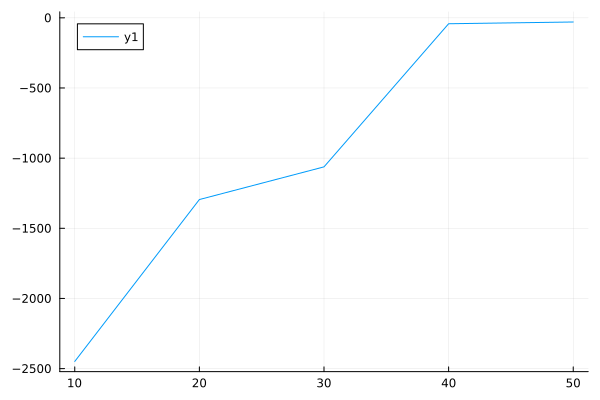

In [10]:
bw = [10,20,30,40,50]
ov = [-2448.8,-1294.991,-1062.158,-42.252,-29.735]

plot(bw,ov)